In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pandas_datareader as data
import datetime
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('Future Stock Prediction Using Last 7 Days Values.h5')

In [3]:
user_input = input('Enter Stock Ticker: ')

Enter Stock Ticker: TCS.NS


In [4]:
start_date = datetime.date.today() - datetime.timedelta(30)
end_date = datetime.date.today()

In [5]:
df = data.DataReader(user_input, 'yahoo', start_date, end_date)

In [6]:
df.reset_index(inplace=True)

In [7]:
x_future = np.array(df.Close[-7:])

In [8]:
scale = max(x_future) - min(x_future)
minimum = min(x_future)

for i in range(0, len(x_future)):
    x_future[i] = (x_future[i] - minimum) / scale

x_future = np.reshape(x_future, (1, 7, 1))

In [9]:
y_future = []

while len(y_future) < 7:
#     Predicting future values using 7-day moving averages of the last day 7 days.
    p = model.predict(x_future)[0]
    
#     Appending the predicted value to y_future
    y_future.append(p)
    
#     Updating input variable, x_future
    x_future = np.roll(x_future, -1)
    x_future[-1] = p

In [10]:
y_future = np.array(y_future)
y_future = np.reshape(y_future, (7))

In [11]:
for i in range(0, len(y_future)):
    y_future[i] = (y_future[i] * scale) + minimum

In [12]:
y_future = np.reshape(y_future, (7, 1))

In [13]:
last7 = pd.DataFrame(df.Close[-7:])
last7.reset_index(drop=True, inplace=True)
y_future = pd.DataFrame(y_future, columns=['Close'])
predictions = pd.concat([last7, y_future], ignore_index=True)

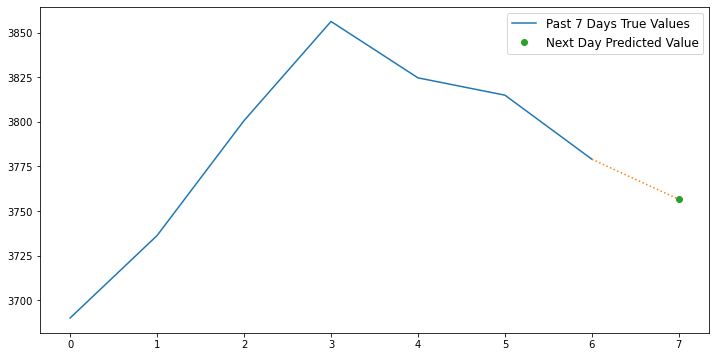

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(predictions[:7], '-', label='Past 7 Days True Values')
plt.plot(predictions[6:8], ':')
plt.plot(predictions[7:8], 'o', label='Next Day Predicted Value')
plt.legend(fontsize=12)
plt.show()

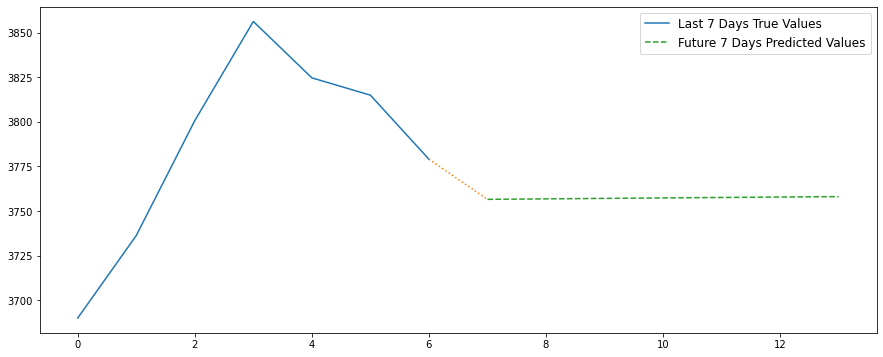

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(predictions[:7], '-', label='Last 7 Days True Values')
plt.plot(predictions[6:8], ':')
plt.plot(predictions[7:], '--', label='Future 7 Days Predicted Values')
plt.legend(fontsize=12)
plt.show()